In [1]:
import tensorflow as tf
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(516, activation = 'relu'))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train, epochs=5)
model.save('hand_write.model')

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2108 - accuracy: 0.9358
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0895 - accuracy: 0.9724
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588 - accuracy: 0.9820
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0441 - accuracy: 0.9863
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.9889
INFO:tensorflow:Assets written to: hand_write.model\assets


In [8]:
model = tf.keras.models.load_model('hand_write.model')
result = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0946 - accuracy: 0.9767


In [9]:
result

[0.09460505098104477, 0.9767000079154968]

In [34]:
img = cv.imread('1.png')[:,:,0]

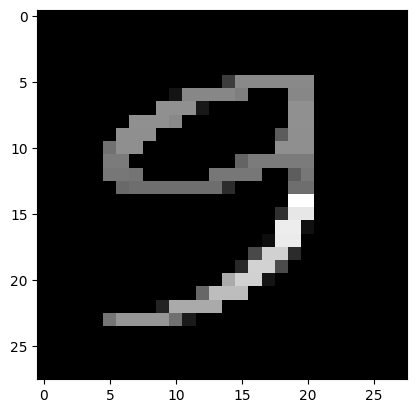

In [112]:
img = cv.imread('test.png')[:,:,0]
ret,thresh = cv.threshold(img,127,255,0)
contours= cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)[0]
for c in contours:
    area = cv.contourArea(c)
    if 800 < area < 30000:
        x,y,w,h = cv.boundingRect(c)
        img1 = img[y-35: y+h+25, x-15:x+20+w]
        break
    
bitwise_not = cv.bitwise_not(img1)
img1 = tf.keras.utils.normalize(bitwise_not, axis=1)
img1 = cv.resize(img1, (28,28))
plt.imshow(img1, cmap='gray')
plt.show()

In [113]:
img1 = np.array([img1])
pred = model.predict(img1)
print(np.argmax(pred))
print(pred)

1/1 [==============================] - 0s 22ms/step
9
[[0.08011571 0.01129243 0.07341313 0.11774581 0.09540492 0.01372791
  0.00272808 0.04272449 0.05613067 0.50671685]]


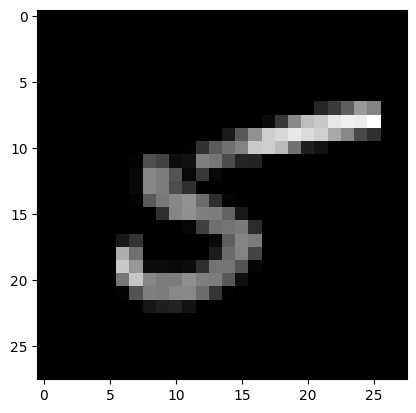

In [85]:
plt.imshow(X_train[145], cmap='gray')
plt.show()
